# Neural nets with KERAS

- github colab : https://homl.info/colab3

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

2023-07-30 17:41:24.368811: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-30 17:41:24.525946: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-30 17:41:25.210518: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
tf.config.list_physical_devices('GPU')

2023-07-30 17:41:26.324902: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-30 17:41:26.406996: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-30 17:41:26.407050: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [6]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [7]:
print(X_train.shape)
print(X_train.dtype)

(55000, 28, 28)
uint8


In [8]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

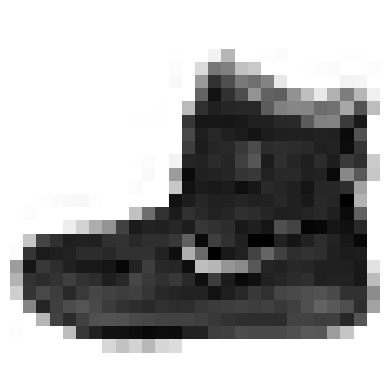

In [9]:
# extra code

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [10]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[0]]

'Ankle boot'

In [13]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

2023-07-30 17:41:27.080187: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-30 17:41:27.080290: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-30 17:41:27.080310: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-30 17:41:27.953433: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-30 17:41:27.953503: I tensorflow/compile

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


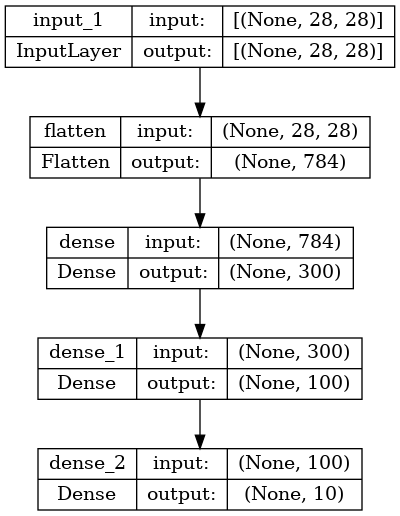

In [15]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [16]:
model.layers

In [17]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
weights

array([[-0.04433443, -0.01740869,  0.00057191, ..., -0.04404495,
         0.06856164,  0.05343582],
       [ 0.06463315,  0.0214984 , -0.06871797, ...,  0.05713093,
        -0.01983289,  0.02998666],
       [-0.03376422, -0.06547611, -0.00214988, ..., -0.06523628,
         0.01937946,  0.00987342],
       ...,
       [ 0.03265922,  0.05231051,  0.03081968, ..., -0.05050758,
        -0.05411773,  0.01056428],
       [ 0.05766487,  0.00280457,  0.05422746, ..., -0.00055234,
         0.07357121,  0.00378157],
       [ 0.04105774, -0.02453663,  0.04488558, ...,  0.04887673,
         0.06947254,  0.04013331]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [22]:
# extra code – this cell is equivalent to the previous cell
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [23]:
# extra code – shows how to convert class ids to one-hot vectors
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
import numpy as np
# extra code – shows how to convert one-hot vectors to class ids
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)

array([0, 5, 1, 0])

In [25]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30


2023-07-30 17:41:30.045035: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-07-30 17:41:30.060650: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fa720041380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-30 17:41:30.060678: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti Laptop GPU, Compute Capability 8.6
2023-07-30 17:41:30.219518: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-07-30 17:41:30.347603: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-07-30 17:41:30.407690: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 [==============================] - 7s 3ms/step - loss: 0.7079 - sparse_categorical_accuracy: 0.7690 - val_loss: 0.5047 - val_sparse_categorical_accuracy: 0.8264
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4895 - sparse_categorical_accuracy: 0.8319 - val_loss: 0.4650 - val_sparse_categorical_accuracy: 0.8316
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4429 - sparse_categorical_accuracy: 0.8460 - val_loss: 0.4282 - val_sparse_categorical_accuracy: 0.8520
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4182 - sparse_categorical_accuracy: 0.8544 - val_loss: 0.3992 - val_sparse_categorical_accuracy: 0.8572
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3963 - sparse_categorical_accuracy: 0.8615 - val_loss: 0.3903 - val_sparse_categorical_accuracy: 0.8594
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3794 - sparse_categoric

In [28]:
print(type(history.history))
print(history.history.keys())

<class 'dict'>
dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


In [40]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# extra code – load and split the California housing dataset, like earlier
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/30
363/363 [==============================] - 3s 5ms/step - loss: 0.6051 - root_mean_squared_error: 0.7779 - val_loss: 0.3777 - val_root_mean_squared_error: 0.6146
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3617 - root_mean_squared_error: 0.6014 - val_loss: 6.2836 - val_root_mean_squared_error: 2.5067
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3718 - root_mean_squared_error: 0.6098 - val_loss: 1.2027 - val_root_mean_squared_error: 1.0967
Epoch 4/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3283 - root_mean_squared_error: 0.5730 - val_loss: 0.2977 - val_root_mean_squared_error: 0.5456
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3139 - root_mean_squared_error: 0.5603 - val_loss: 1.3658 - val_root_mean_squared_error: 1.1687
Epoch 6/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3143 - root_mean_squared_error: 0.5606 - val_loss: 0.4264 - val_

In [46]:
print(rmse_test)
print(y_pred)
print(housing.data.shape)

0.5287970304489136
[[0.4841105]
 [0.9900848]
 [4.343612 ]]
(20640, 8)
